<a href="https://colab.research.google.com/github/Kiisudu/pythonProject1/blob/master/Flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_validation_scaled, y_validation))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test_scaled)

# Decode one-hot encoded predictions to get class labels
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))

Epoch 1/10


ValueError: ignored

In [ ]:
cols = ['DAY_OF_WEEK', 'AIRLINE_NAME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
multi = pd.get_dummies(multi, columns=cols)
multi

DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
1939                -8.0       7.0        44.0           197.0         190.0   
1940               -12.0      12.0       125.0           200.0         198.0   
1941                -8.0       9.0       206.0           195.0         219.0   
1942                -7.0       8.0       241.0           195.0         209.0   
1943                -7.0       9.0       502.0           195.0         203.0   
...                  ...       ...         ...             ...           ...   
5332648             -9.0      23.0      1354.0            70.0          75.0   
5332649             -7.0      17.0      2145.0            74.0          69.0   
5332650              9.0      17.0      1406.0            70.0          82.0   
5332651             10.0      22.0      2207.0            74.0          75.0   
5332652            123.0      12.0      2350.0            74.0          65.0   

         AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  ARRIVAL_DELAY  delay_6  \
1939        179.0      1448      443.0      4.0          -15.0        0   
1940        181.0      1448      526.0      5.0          -14.0        0   
1941        205.0      1448      631.0      5.0           16.0        2   
1942        193.0      1448      654.0      8.0            7.0        1   
1943        186.0      1448      908.0      8.0            1.0        1   
...           ...       ...        ...      ...            ...      ...   
5332648      48.0       294     1442.0      4.0           -4.0        0   
5332649      47.0       294     2232.0      5.0          -12.0        0   
5332650      62.0       294     1508.0      3.0           21.0        2   
5332651      50.0       294     2257.0      3.0           11.0        1   
5332652      50.0       294       40.0      3.0          114.0        4   

         DAY_OF_WEEK_1  DAY_OF_WEEK_2  DAY_OF_WEEK_3  DAY_OF_WEEK_4  \
1939                 1              0              0              0   
1940                 1              0              0              0   
1941                 1              0              0              0   
1942                 1              0              0              0   
1943                 1              0              0              0   
...                ...            ...            ...            ...   
5332648              0              0              0              0   
5332649              0              0              0              0   
5332650              1              0              0              0   
5332651              1              0              0              0   
5332652              0              1              0              0   

         DAY_OF_WEEK_5  DAY_OF_WEEK_6  DAY_OF_WEEK_7  \
1939                 0              0              0   
1940                 0              0              0   
1941                 0              0              0   
1942                 0              0              0   
1943                 0              0              0   
...                ...            ...            ...   
5332648              0              0              1   
5332649              0              0              1   
5332650              0              0              0   
5332651              0              0              0   
5332652              0              0              0   

         AIRLINE_NAME_Alaska Airlines Inc.  \
1939                                     1   
1940                                     1   
1941                                     1   
1942                                     1   
1943                                     1   
...                                    ...   
5332648                                  0   
5332649                                  0   
5332650                                  0   
5332651                                  0   
5332652                                  0   

         AIRLINE_NAME_American Airlines Inc.  \
1939                

In [ ]:
multi = multi.dropna(subset=['ELAPSED_TIME'])

In [ ]:
delay_6 = []
for row in multi['ARRIVAL_DELAY']:
    if row <= 0:
        delay_6.append(0)
    elif 0 < row <= 15:
        delay_6.append(1)
    elif 15 < row <=30:
        delay_6.append(2)
    elif 30 < row <= 60:
        delay_6.append(3)
    elif 60 < row <= 180:
        delay_6.append(4)
    else:
        delay_6.append(5)

multi['delay_6'] = delay_6

<ipython-input-10-bbe1da8f54dc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi['delay_6'] = delay_6


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d usdot/flight-delays

 99% 189M/191M [00:07<00:00, 28.6MB/s]
100% 191M/191M [00:07<00:00, 26.1MB/s]


In [ ]:
! unzip flight-delays.zip

Archive:  flight-delays.zip
  inflating: airlines.csv            
  inflating: airports.csv            
  inflating: flights.csv             


In [ ]:
! mkdir ~/.kaggle

In [ ]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import plotly.graph_objects as go
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 50)
from sklearn.metrics import classification_report, confusion_matrix, recall_score

## Load the Datasets


In [ ]:
import pandas as pd
df = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

## Merge Datasets

In [ ]:
# Merge based on ' ORIGIN_AIRPORT'
df = pd.merge(df, airports[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', "LATITUDE", 'LONGITUDE']],
              left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Merge based on 'DESTINATION_AIRPORT'
df = pd.merge(df, airports[['IATA_CODE', 'AIRPORT','STATE', 'CITY']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')


df = pd.merge(df, airlines, left_on='AIRLINE', right_on='IATA_CODE')



In [ ]:
df=df.rename(columns={
    'CITY_x' : 'ORIGIN_CITY',
    'STATE_x' : 'ORIGIN_STATE',
    'AIRPORT_x' : 'ORIGIN_AIRPORT_NAME',
    'AIRPORT_y' : 'DESTINATION_AIRPORT_NAME',
    'CITY_y' : 'DESTINATION_CITY',
    'STATE_y' : 'DESTINATION_STATE',
    'AIRLINE_y' : 'AIRLINE_NAME',
    'AIRLINE_x' : 'AIRLINE_CODE'})

In [ ]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_CODE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4           AS             98      N407AS   
1  2015      1    1            4           AS            108      N309AS   
2  2015      1    1            4           AS            136      N431AS   
3  2015      1    1            4           AS            134      N464AS   
4  2015      1    1            4           AS            114      N303AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            ANC                 SEA                   45            41.0   
2            ANC                 SEA                  135             NaN   
3            ANC                 SEA                  155           140.0   
4            ANC                 SEA                  220           209.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -4.0      17.0        58.0           204.0         194.0   
2              NaN       NaN         NaN           205.0           NaN   
3            -15.0      17.0       157.0           218.0         198.0   
4            -11.0      15.0       224.0           200.0         199.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     173.0      1448      451.0      4.0                509         455.0   
2       NaN      1448        NaN      NaN                600           NaN   
3     170.0      1448      547.0     11.0                633         558.0   
4     176.0      1448      620.0      8.0                640         628.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                 NaN               NaN   
1          -14.0         0          0                 NaN               NaN   
2         2200.0         0          1                   A               NaN   
3          -35.0         0          0                 NaN               NaN   
4          -12.0         0          0                 NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
0             NaN            NaN                  NaN            NaN   
1             NaN            NaN                  NaN            NaN   
2             NaN            NaN                  NaN            NaN   
3             NaN            NaN                  NaN            NaN   
4             NaN            NaN                  NaN            NaN   

              fl_delay_c flight_performance IATA_CODE_x  \
0                On time            On-Time         ANC   
1                On time            On-Time         ANC   
2  Cancelled or Diverted            Delayed         ANC   
3                On time            On-Time         ANC   
4                On time            On-Time         ANC   

                           ORIGIN_AIRPORT_NAME ORIGIN_CITY ORIGIN_STATE  \
0  Ted Stevens Anchorage International Airport   Anchorage           AK   
1  Ted Stevens Anchorage International Airport   Anchorage           AK   
2  Ted Stevens Anchorage International Airport   Anchorage           AK   
3  Ted Stevens Anchorage International Airport   Anchorage           AK   
4  Ted Stevens Anchorage International Airport   Anchorage           AK   

   LATITUDE  LONGITUDE IATA_CODE_y              DESTINATION_AIRPORT_NAME  \
0  61.17432 -149.99619         SEA  Seattle-Tacoma International Airport   
1  61.17432 -149.99619         SEA  Seattle-Tacoma International Airport   
2  61.17432 -149.99619         SEA  Seattle-Tacoma International Airport   
3  61.17432 -149.99619         SEA  Seattle-Tacoma International Airport   
4  61.17432 -149.99619         SEA  Seattle-Tacoma International Airport   

In [ ]:
df.ARRIVAL_DELAY.max()

1971.0

## Delay categories

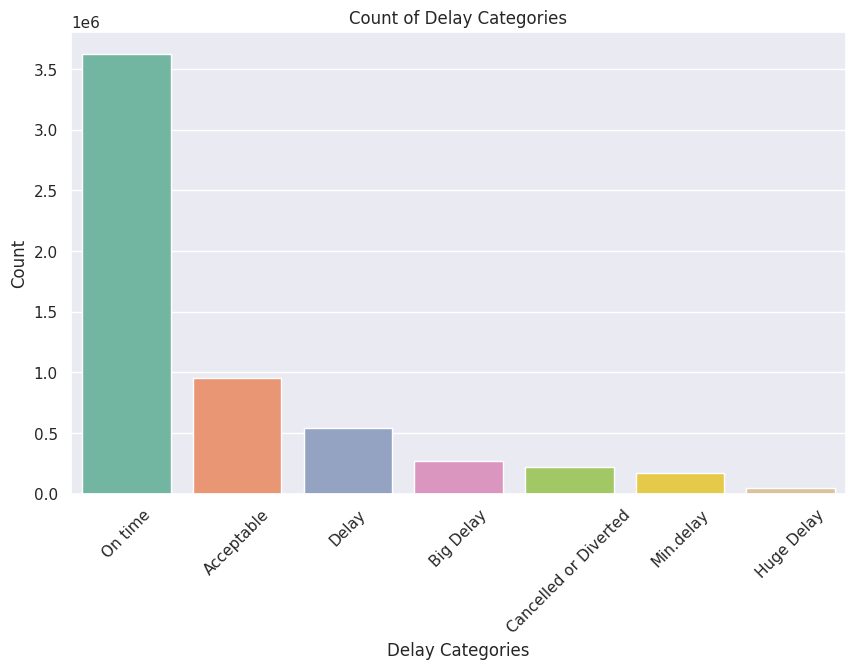

In [ ]:
ff = df
ff[['ARRIVAL_DELAY']] = ff[['ARRIVAL_DELAY']].fillna(value=2200)
fl_delay_c = []
for row in ff['ARRIVAL_DELAY']:
    if row <= 0:
        fl_delay_c.append('On time')
    elif 1 < row <= 15:
        fl_delay_c.append('Acceptable')
    elif 15 < row <= 20:
        fl_delay_c.append('Min.delay')
    elif 20 < row <= 60:
        fl_delay_c.append('Delay')
    elif 60 < row <= 180:
        fl_delay_c.append('Big Delay')
    elif 180< row <= 2000:
        fl_delay_c.append('Huge Delay')
    else:
        fl_delay_c.append('Cancelled or Diverted')

ff['fl_delay_c'] = fl_delay_c

# Calculate the counts for each category
counts = ff['fl_delay_c'].value_counts()

sns.set(palette="Set2")

# Create the countplot using the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)

# Set the title and labels
plt.title('Count of Delay Categories')
plt.xlabel('Delay Categories')
plt.ylabel('Count')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df = df.dropna(subset=['ARRIVAL_TIME'])


In [ ]:
#df = df.drop(['IATA_CODE_x', 'IATA_CODE_y'], axis=1)
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)],
          axis=1).rename(columns={0: 'Missing Records', 1: 'Percentage (%)'})


Missing Records  Percentage (%)
YEAR                               0        0.000000
MONTH                              0        0.000000
DAY                                0        0.000000
DAY_OF_WEEK                        0        0.000000
AIRLINE                            0        0.000000
FLIGHT_NUMBER                      0        0.000000
TAIL_NUMBER                    14721        0.252978
ORIGIN_AIRPORT                     0        0.000000
DESTINATION_AIRPORT                0        0.000000
SCHEDULED_DEPARTURE                0        0.000000
DEPARTURE_TIME                 86153        1.480526
DEPARTURE_DELAY                86153        1.480526
TAXI_OUT                       89047        1.530259
WHEELS_OFF                     89047        1.530259
SCHEDULED_TIME                     6        0.000103
ELAPSED_TIME                  105071        1.805629
AIR_TIME                      105071        1.805629
DISTANCE                           0        0.000000
WHEELS_ON                      92513        1.589822
TAXI_IN                        92513        1.589822
SCHEDULED_ARRIVAL                  0        0.000000
ARRIVAL_TIME                   92513        1.589822
ARRIVAL_DELAY                      0        0.000000
DIVERTED                           0        0.000000
CANCELLED                          0        0.000000
CANCELLATION_REASON          5729195       98.455357
AIR_SYSTEM_DELAY             4755640       81.724960
SECURITY_DELAY               4755640       81.724960
AIRLINE_DELAY                4755640       81.724960
LATE_AIRCRAFT_DELAY          4755640       81.724960
WEATHER_DELAY                4755640       81.724960
fl_delay_c                         0        0.000000

In [ ]:
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400:
            chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

# Function that combines a date and time to produce a datetime.datetime


def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0], x[1])


# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):
    liste = []
    for index, cols in df[['DATE', col]].iterrows():
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0, 0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)


df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)


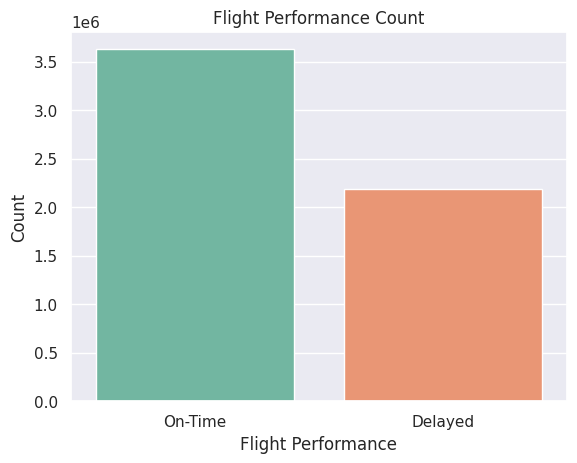

In [ ]:
# Create a column to indicate flight performance
df['flight_performance'] = ['On-Time' if x <= 0 else 'Delayed' for x in df['ARRIVAL_DELAY']]

# Create a countplot of flight performance
sns.countplot(data=df, x='flight_performance')
plt.xlabel('Flight Performance')
plt.ylabel('Count')
plt.title('Flight Performance Count')
plt.show()

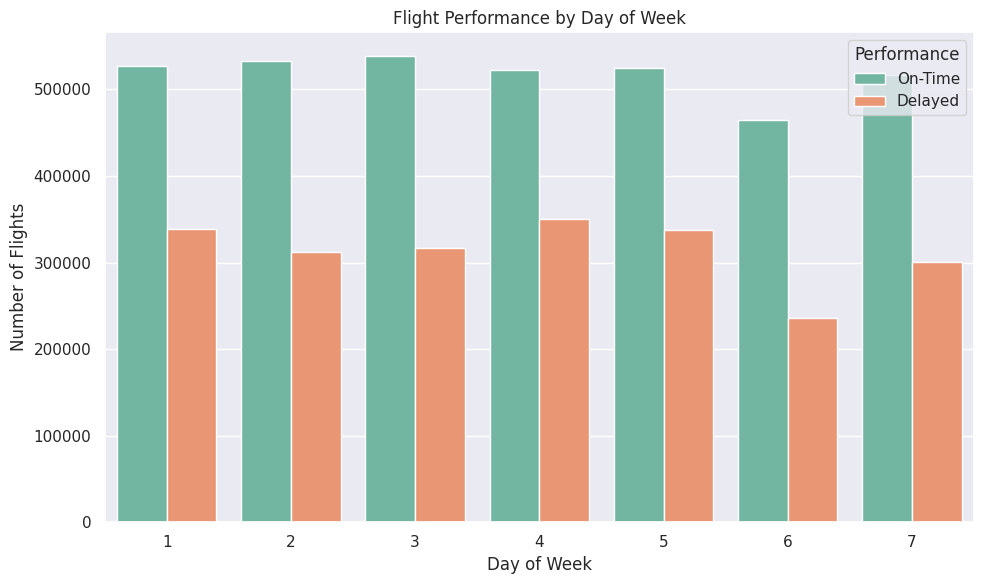

In [ ]:


# Create a pivot table for the data
pivot_table = df.pivot_table(index='DAY_OF_WEEK', columns='flight_performance', aggfunc='size', fill_value=0)

# Reset index for Seaborn compatibility
pivot_table = pivot_table.reset_index()

# Melt the pivot table to create a single column for each performance category
melted_data = pd.melt(pivot_table, id_vars=['DAY_OF_WEEK'], value_vars=['On-Time', 'Delayed'], var_name='Performance', value_name='Number of Flights')

# Create a stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(palette="Set2")
ax = sns.barplot(data=melted_data, x='DAY_OF_WEEK', y='Number of Flights', hue='Performance')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.title('Flight Performance by Day of Week')

# Show the plot
plt.tight_layout()
plt.show()


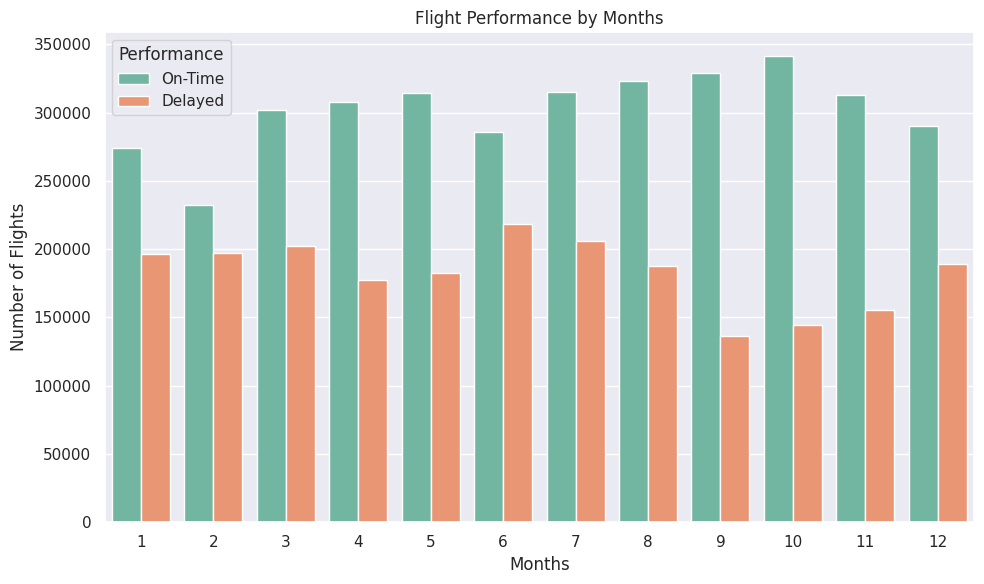

In [ ]:
# Create a pivot table for the data
pivot_table = df.pivot_table(index='MONTH', columns='flight_performance', aggfunc='size', fill_value=0)

# Reset index for Seaborn compatibility
pivot_table = pivot_table.reset_index()

# Melt the pivot table to create a single column for each performance category
melted_data = pd.melt(pivot_table, id_vars=['MONTH'], value_vars=['On-Time', 'Delayed'], var_name='Performance', value_name='Number of Flights')

# Create a stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(palette="Set2")
ax = sns.barplot(data=melted_data, x='MONTH', y='Number of Flights', hue='Performance')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Number of Flights')
plt.title('Flight Performance by Months')

# Show the plot
plt.tight_layout()
plt.show()

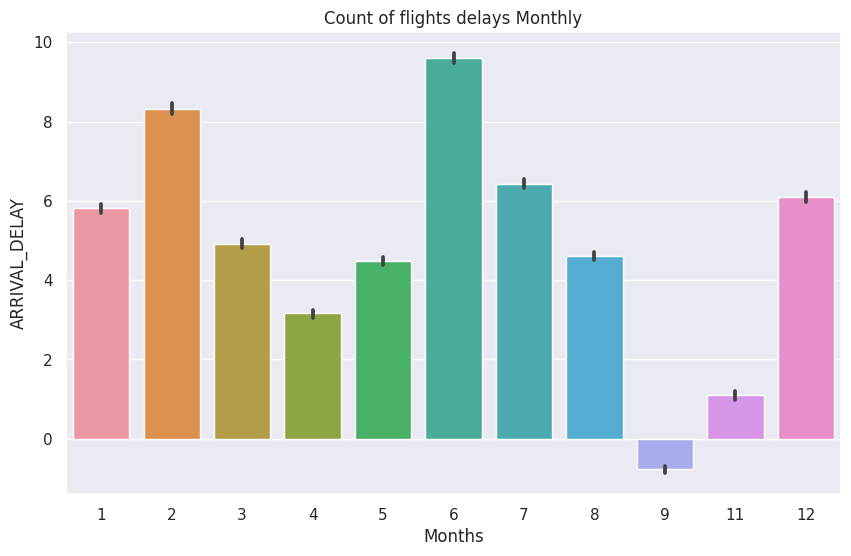

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(palette="Set2")
sns.barplot(df, x='MONTH', y='ARRIVAL_DELAY')

# Set the title and labels
plt.title('Count of flights delays Monthly')
plt.xlabel('Months')

# plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:

airlines_group = df.groupby(df.AIRLINE_NAME)
airlines_gr = df.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].agg(
    ['mean', 'min', 'max', 'skew', 'std', 'count'])

# Sort by 'mean' value in descending order
airlines_sorted = airlines_gr.sort_values(by='mean', ascending=False)
airlines_sorted


mean   min     max       skew        std  \
AIRLINE_NAME                                                                  
Spirit Air Lines              15.210786 -60.0   833.0   3.387172  46.653875   
Frontier Airlines Inc.        13.729468 -73.0  1101.0   5.023040  52.976344   
American Eagle Airlines Inc.   7.316540 -63.0  1272.0   5.568450  44.535512   
Atlantic Southeast Airlines    6.964550 -64.0  1223.0   4.808222  41.189887   
JetBlue Airways                6.949339 -76.0  1002.0   3.805254  42.039092   
Skywest Airlines Inc.          6.221438 -69.0  1372.0   5.989749  39.747253   
United Air Lines Inc.          6.211316 -81.0  1294.0   4.693095  44.714560   
Virgin America                 4.979539 -78.0   651.0   3.795243  35.799033   
Southwest Airlines Co.         4.837831 -73.0   659.0   4.010286  33.227323   
American Airlines Inc.         3.935214 -87.0  1971.0  10.022963  45.015492   
US Airways Inc.                3.706209 -87.0   750.0   4.407366  32.378743   
Hawaiian Airlines Inc.         2.161856 -67.0  1467.0  19.723253  25.787022   
Delta Air Lines Inc.           0.680265 -79.0  1274.0   8.393278  39.166200   
Alaska Airlines Inc.          -0.791409 -82.0   950.0   6.138692  29.018948   

                                count     size  
AIRLINE_NAME                                    
Spirit Air Lines               105059   107171  
Frontier Airlines Inc.          82005    82735  
American Eagle Airlines Inc.   257130   272650  
Atlantic Southeast Airlines    509621   526249  
JetBlue Airways                240304   245135  
Skywest Airlines Inc.          528328   539545  
United Air Lines Inc.          462086   469829  
Virgin America                  55813    56439  
Southwest Airlines Co.        1138350  1157339  
American Airlines Inc.         636554   648694  
US Airways Inc.                194223   198715  
Hawaiian Airlines Inc.          69815    70030  
Delta Air Lines Inc.           794817   800329  
Alaska Airlines Inc.           157025   158054

## Arrival delay

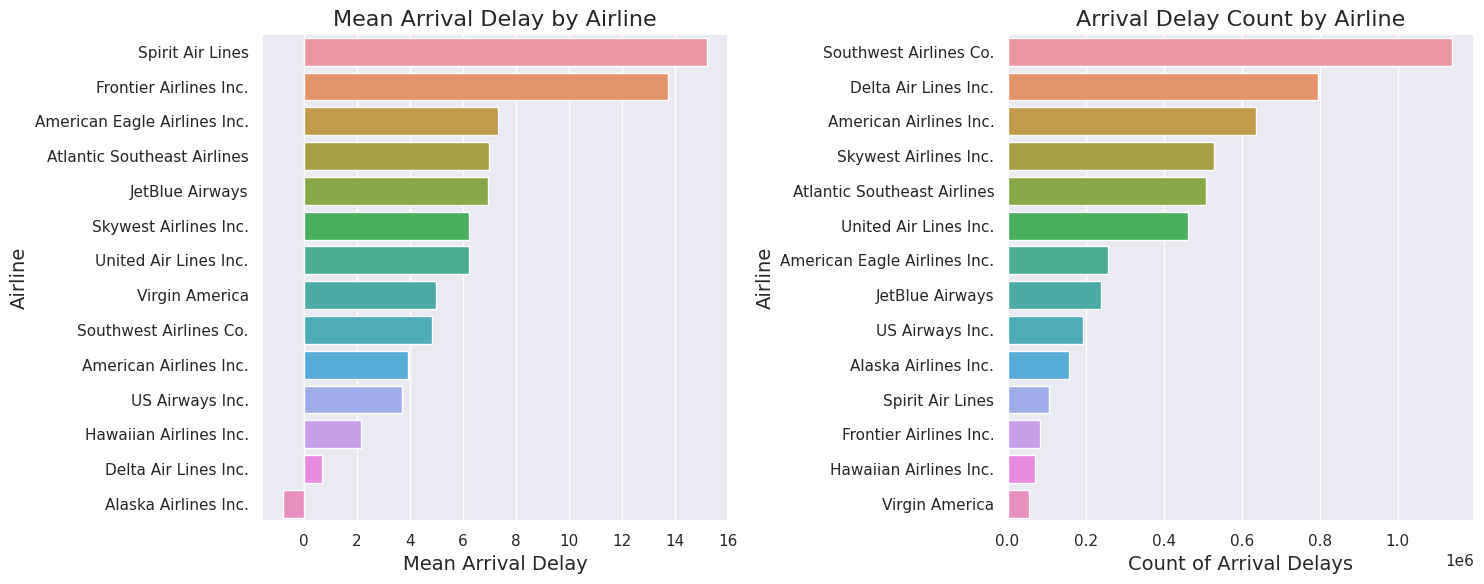

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# for Mean Arrival Delay
sns.barplot(x='mean', y=airlines_sorted.index, data=airlines_sorted, orient='h', ax=axes[0])
axes[0].set_xlabel('Mean Arrival Delay', fontsize=14)
axes[0].set_ylabel('Airline', fontsize=14)
axes[0].set_title('Mean Arrival Delay by Airline', fontsize=16)

# for Count of Arrival Delays
airlines_count = airlines_gr.sort_values(by='count', ascending=False)
sns.barplot(x='count', y=airlines_count.index, data=airlines_count, orient='h', ax=axes[1])
axes[1].set_xlabel('Count of Arrival Delays', fontsize=14)
axes[1].set_ylabel('Airline', fontsize=14)
axes[1].set_title('Arrival Delay Count by Airline', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_CODE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4           AS             98      N407AS   
1  2015      1    1            4           AS            108      N309AS   
3  2015      1    1            4           AS            134      N464AS   
4  2015      1    1            4           AS            114      N303AS   
5  2015      1    1            4           AS            730      N423AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            ANC                 SEA                   45            41.0   
3            ANC                 SEA                  155           140.0   
4            ANC                 SEA                  220           209.0   
5            ANC                 SEA                  505           457.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -4.0      17.0        58.0           204.0         194.0   
3            -15.0      17.0       157.0           218.0         198.0   
4            -11.0      15.0       224.0           200.0         199.0   
5             -8.0      16.0       513.0           205.0         199.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     173.0      1448      451.0      4.0                509         455.0   
3     170.0      1448      547.0     11.0                633         558.0   
4     176.0      1448      620.0      8.0                640         628.0   
5     179.0      1448      912.0      4.0                930         916.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                 NaN               NaN   
1          -14.0         0          0                 NaN               NaN   
3          -35.0         0          0                 NaN               NaN   
4          -12.0         0          0                 NaN               NaN   
5          -14.0         0          0                 NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
0             NaN            NaN                  NaN            NaN   
1             NaN            NaN                  NaN            NaN   
3             NaN            NaN                  NaN            NaN   
4             NaN            NaN                  NaN            NaN   
5             NaN            NaN                  NaN            NaN   

  IATA_CODE_x                          ORIGIN_AIRPORT_NAME ORIGIN_CITY  \
0         ANC  Ted Stevens Anchorage International Airport   Anchorage   
1         ANC  Ted Stevens Anchorage International Airport   Anchorage   
3         ANC  Ted Stevens Anchorage International Airport   Anchorage   
4         ANC  Ted Stevens Anchorage International Airport   Anchorage   
5         ANC  Ted Stevens Anchorage International Airport   Anchorage   

  ORIGIN_STATE  LATITUDE  LONGITUDE IATA_CODE_y  \
0           AK  61.17432 -149.99619         SEA   
1           AK  61.17432 -149.99619         SEA   
3           AK  61.17432 -149.99619         SEA   
4           AK  61.17432 -149.99619         SEA   
5           AK  61.17432 -149.99619         SEA   

               DESTINATION_AIRPORT_NAME DESTINATION_STATE DESTINATION_CITY  \
0  Seattle-Tacoma International Airport                WA          Seattle   
1  Seattle-Tacoma International Airport                WA          Seattle   
3  Seattle-Tacoma International Airport                WA          Seattle   
4  Seattle-Tacoma International Airport                WA          Seattle   
5  Seattle-Tacoma International Airport                WA          Seattle   

  IATA_CODE          AIRLINE_NAME       

In [ ]:
airlines_group_dep = df.groupby(df.AIRLINE_NAME)
airlines_dep = df.groupby('AIRLINE_NAME')['DEPARTURE_DELAY'].agg(
    ['mean', 'min', 'max', 'skew', 'std', 'count'])

# Sort by 'mean' value in descending order
airlines_departure_delay = airlines_gr.sort_values(by='mean', ascending=False)
airlines_departure_delay

mean   min     max       skew        std  \
AIRLINE_NAME                                                                  
Spirit Air Lines              15.210786 -60.0   833.0   3.387172  46.653875   
Frontier Airlines Inc.        13.729468 -73.0  1101.0   5.023040  52.976344   
American Eagle Airlines Inc.   7.316540 -63.0  1272.0   5.568450  44.535512   
Atlantic Southeast Airlines    6.964550 -64.0  1223.0   4.808222  41.189887   
JetBlue Airways                6.949339 -76.0  1002.0   3.805254  42.039092   
Skywest Airlines Inc.          6.221438 -69.0  1372.0   5.989749  39.747253   
United Air Lines Inc.          6.211316 -81.0  1294.0   4.693095  44.714560   
Virgin America                 4.979539 -78.0   651.0   3.795243  35.799033   
Southwest Airlines Co.         4.837831 -73.0   659.0   4.010286  33.227323   
American Airlines Inc.         3.935214 -87.0  1971.0  10.022963  45.015492   
US Airways Inc.                3.706209 -87.0   750.0   4.407366  32.378743   
Hawaiian Airlines Inc.         2.161856 -67.0  1467.0  19.723253  25.787022   
Delta Air Lines Inc.           0.680265 -79.0  1274.0   8.393278  39.166200   
Alaska Airlines Inc.          -0.791409 -82.0   950.0   6.138692  29.018948   

                                count     size  
AIRLINE_NAME                                    
Spirit Air Lines               105059   107171  
Frontier Airlines Inc.          82005    82735  
American Eagle Airlines Inc.   257130   272650  
Atlantic Southeast Airlines    509621   526249  
JetBlue Airways                240304   245135  
Skywest Airlines Inc.          528328   539545  
United Air Lines Inc.          462086   469829  
Virgin America                  55813    56439  
Southwest Airlines Co.        1138350  1157339  
American Airlines Inc.         636554   648694  
US Airways Inc.                194223   198715  
Hawaiian Airlines Inc.          69815    70030  
Delta Air Lines Inc.           794817   800329  
Alaska Airlines Inc.           157025   158054

## Departure delay

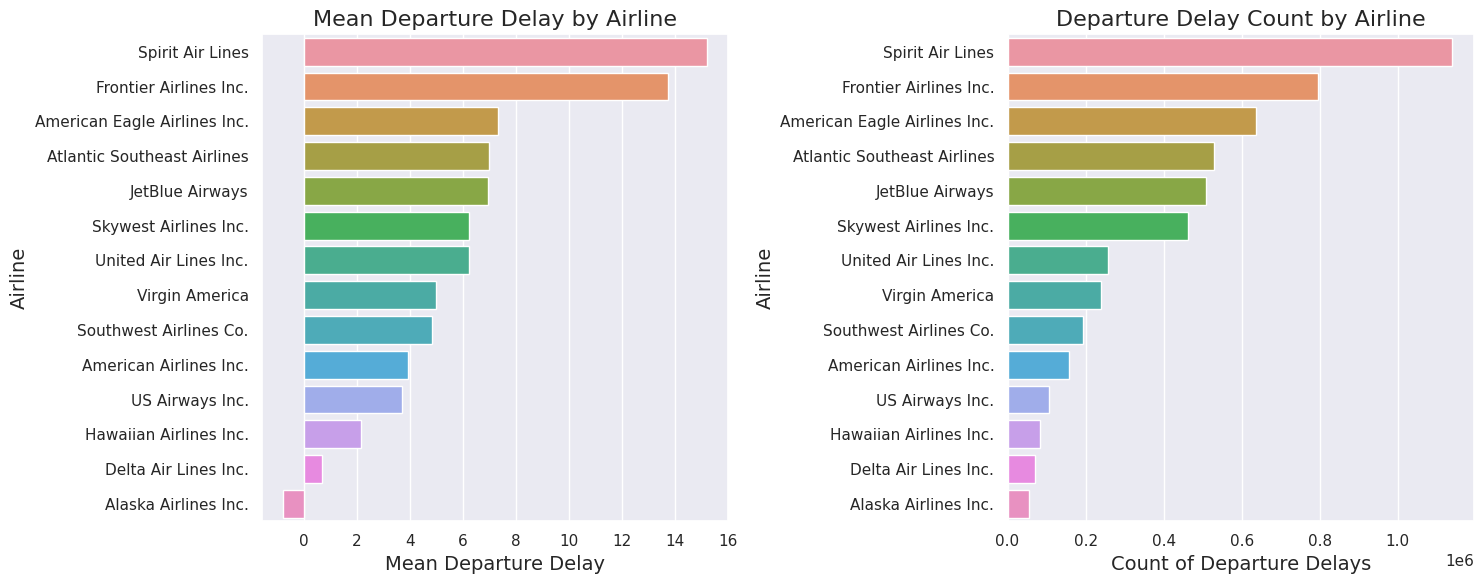

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# for Mean Departure Delay
sns.barplot(airlines_departure_delay, x='mean', y=airlines_sorted.index, orient='h', ax=axes[0])
axes[0].set_xlabel('Mean Departure Delay', fontsize=14)
axes[0].set_ylabel('Airline', fontsize=14)
axes[0].set_title('Mean Departure Delay by Airline', fontsize=16)

# for Count of Departure Delays
airlines_depar_delay=airlines_gr.sort_values(by= 'count', ascending = False)
sns.barplot(airlines_depar_delay, x = 'count', y=airlines_sorted.index, orient='h', ax=axes[1])
axes[1].set_xlabel('Count of Departure Delays', fontsize=14)
axes[1].set_ylabel('Airline', fontsize=14)
axes[1].set_title('Departure Delay Count by Airline', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:

import plotly.graph_objs as go
delay= df.dropna(subset=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                        'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                        'WEATHER_DELAY'], how='all')
data = delay[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]
# Create a list of colors for each value
colors = ['red', 'blue', 'green', 'orange', 'purple']
# Calculate the total delay for each category
total_delay = data.sum()
# Create a Pie trace for each category
fig = go.Figure(data=[go.Pie(
    labels=data.columns,
    values=total_delay,
    marker=dict(colors=colors),
    text=total_delay,
    textinfo='label+percent'
)])
# Customize the layout
fig.update_layout(
    title='Pie Chart of Total Delays by Category',
    width=800,  # Adjust the width of the figure (in pixels)
    height=600,  # Adjust the height of the figure (in pixels)
    margin=dict(l=20, r=20, t=50, b=50)  # Adjust the margins (in pixels)
)
# Show the plot
fig.show()

In [ ]:
reason= df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY', 'DAY_OF_WEEK','MONTH', 'AIRLINE_NAME', 'ORIGIN_CITY', "ORIGIN_STATE", 'ORIGIN_AIRPORT_NAME', 'DESTINATION_AIRPORT_NAME', 'DESTINATION_STATE', 'DESTINATION_CITY', 'ELAPSED_TIME', 'DISTANCE']]
reason= reason.dropna(subset=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                        'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                        'WEATHER_DELAY'], how='all')

In [ ]:
late_aircraft_delay1= []

for row in reason['LATE_AIRCRAFT_DELAY']:
    if row < 15:
        late_aircraft_delay1.append(0)
    elif 15 < row <= 30:
        late_aircraft_delay1.append(1)
    elif 45 < row <= 60:
        late_aircraft_delay1.append(2)
    elif 60 < row <= 180:
         late_aircraft_delay1.append(3)
    else:
        late_aircraft_delay1.append(4)
reason['late_aircraft_delay1'] = late_aircraft_delay1

air_system_delay1 = []

for row in reason['AIR_SYSTEM_DELAY']:

    if row < 15:
        air_system_delay1.append(0)
    elif 15 < row <= 30:
        air_system_delay1.append(1)
    elif 30 < row <= 60:
        air_system_delay1.append(2)
    elif 60 < row <= 180:
        air_system_delay1.append(3)
    else:
        air_system_delay1.append(4)

reason['air_system_delay1'] =air_system_delay1

weather_delay1= []

for row in reason['WEATHER_DELAY']:
    if row < 15:
        weather_delay1.append(0)
    elif 15 < row <= 30:
        weather_delay1.append(1)
    elif 30 < row <= 60:
        weather_delay1.append(2)
    elif 60 < row <= 180:
         weather_delay1.append(3)
    else:
         weather_delay1.append(4)
reason['weather_delay1'] = weather_delay1

airline_delay1= []

for row in reason['AIRLINE_DELAY']:
    if row < 15:
        airline_delay1.append(0)
    elif 15 < row <= 30:
        airline_delay1.append(1)
    elif 30 < row <= 60:
        airline_delay1.append(2)
    elif 60 < row <= 180:
         airline_delay1.append(3)
    else:
         airline_delay1.append(4)
reason['airline_delay1'] = airline_delay1





In [ ]:
categ =reason[['weather_delay1', 'air_system_delay1', 'airline_delay1', 'late_aircraft_delay1', 'AIRLINE_NAME']]
categ= categ.rename(columns={'weather_delay1' : 'Weather delay',
                             'air_system_delay1' : 'Air system delay',
                             'airline_delay1' : 'Airline delay',
                             'late_aircraft_delay1' : 'Late aircraft delay'})

In [ ]:
fig.update_layout(
    title='Pie Chart of Total Delays by Category',
    width=800,  # Adjust the width of the figure (in pixels)
    height=600,  # Adjust the height of the figure (in pixels)
    margin=dict(l=20, r=20, t=50, b=50)  # Adjust the margins (in pixels)

In [ ]:
import plotly.express as px

def delay_amount(df, column_name):
    # Remove rows with zero values in the specified column
    filtered_data = df[df[column_name] != 0]

    # Count the remaining numbers after removing zeros
    counts = filtered_data[column_name].value_counts()

    # Create the stacked bar chart
    fig = px.histogram(filtered_data, x=column_name, color=column_name)

    # Update the layout with labels and title
    fig.update_layout(
        xaxis_title=column_name,
        yaxis_title='Flight count',
        title=f'Delay levels of {column_name}',
        width=800,  # Adjust the width of the figure (in pixels)
        height=600,  # Adjust the height of the figure (in pixels)
        margin=dict(l=20, r=20, t=50, b=50),  # Adjust the margins (in pixels)
        xaxis=dict(
            ticktext=['minimum delay', 'delay', 'big delay', 'huge delay'],
            tickvals=[1, 2, 3, 4],
            tickfont=dict(size=14)  # Adjust the font size of x-axis tick labels
        )
    )

    # Show the plot
    fig.show()

# Call the function for each delay category
delay_amount(categ, 'Airline delay')
delay_amount(categ, 'Weather delay')
delay_amount(categ, 'Air system delay')
delay_amount(categ, 'Late aircraft delay')


In [ ]:
df6 = df[df['MONTH'] == 6]

In [ ]:
df6.head()

DAY_OF_WEEK ORIGIN_AIRPORT DESTINATION_AIRPORT  DEPARTURE_DELAY  \
1939            1            ANC                 SEA             -8.0   
1940            1            ANC                 SEA            -12.0   
1941            1            ANC                 SEA             -8.0   
1942            1            ANC                 SEA             -7.0   
1943            1            ANC                 SEA             -7.0   

      TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
1939       7.0        44.0           197.0         190.0     179.0      1448   
1940      12.0       125.0           200.0         198.0     181.0      1448   
1941       9.0       206.0           195.0         219.0     205.0      1448   
1942       8.0       241.0           195.0         209.0     193.0      1448   
1943       9.0       502.0           195.0         203.0     186.0      1448   

      WHEELS_ON  TAXI_IN  ARRIVAL_DELAY          AIRLINE_NAME  delayed  
1939      443.0      4.0          -15.0  Alaska Airlines Inc.    False  
1940      526.0      5.0          -14.0  Alaska Airlines Inc.    False  
1941      631.0      5.0           16.0  Alaska Airlines Inc.    False  
1942      654.0      8.0            7.0  Alaska Airlines Inc.    False  
1943      908.0      8.0            1.0  Alaska Airlines Inc.    False

In [ ]:
df6.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
AIRLINE_CODE                     0
FLIGHT_NUMBER                    0
TAIL_NUMBER                      0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
SCHEDULED_DEPARTURE              0
DEPARTURE_TIME                   0
DEPARTURE_DELAY                  0
TAXI_OUT                         0
WHEELS_OFF                       0
SCHEDULED_TIME                   0
ELAPSED_TIME                  1661
AIR_TIME                      1661
DISTANCE                         0
WHEELS_ON                        0
TAXI_IN                          0
SCHEDULED_ARRIVAL                0
ARRIVAL_TIME                     0
ARRIVAL_DELAY                 1661
DIVERTED                         0
CANCELLED                        0
CANCELLATION_REASON         494508
AIR_SYSTEM_DELAY            378766
SECURITY_DELAY              378766
AIRLINE_DELAY       

In [ ]:
df6 = df6.dropna(subset=['ELAPSED_TIME'])

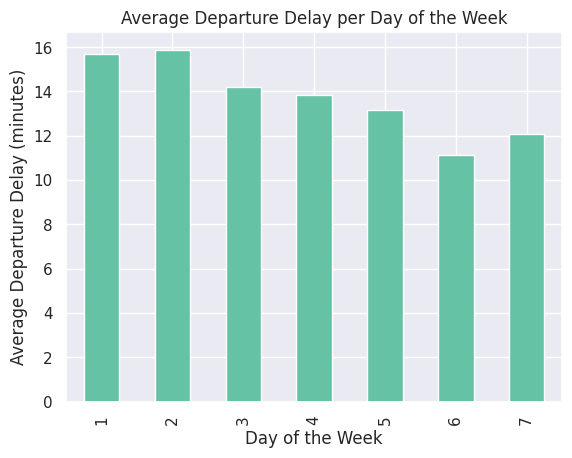

In [ ]:
# Grouping the data by day of the week and calculating the mean departure delay
average_delay_per_week = df6.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

# Creating the bar plot
average_delay_per_week.plot(kind='bar')

# Adding labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay per Day of the Week")

# Displaying the plot
plt.show()

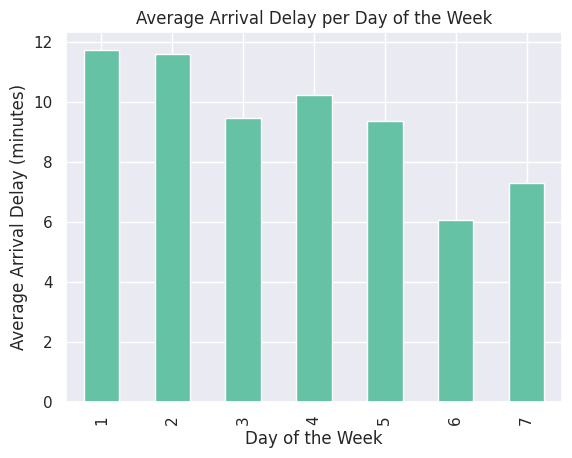

In [ ]:
# Grouping the data by day of the week and calculating the mean departure delay
average_delay_per_week = df6.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

# Creating the bar plot
average_delay_per_week.plot(kind='bar')

# Adding labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay per Day of the Week")

# Displaying the plot
plt.show()

In [ ]:
df6.head()

DAY_OF_WEEK ORIGIN_AIRPORT DESTINATION_AIRPORT  DEPARTURE_DELAY  \
1939            1            ANC                 SEA             -8.0   
1940            1            ANC                 SEA            -12.0   
1941            1            ANC                 SEA             -8.0   
1942            1            ANC                 SEA             -7.0   
1943            1            ANC                 SEA             -7.0   

      TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
1939       7.0        44.0           197.0         190.0     179.0      1448   
1940      12.0       125.0           200.0         198.0     181.0      1448   
1941       9.0       206.0           195.0         219.0     205.0      1448   
1942       8.0       241.0           195.0         209.0     193.0      1448   
1943       9.0       502.0           195.0         203.0     186.0      1448   

      WHEELS_ON  TAXI_IN  ARRIVAL_DELAY          AIRLINE_NAME  delayed  
1939      443.0      4.0          -15.0  Alaska Airlines Inc.    False  
1940      526.0      5.0          -14.0  Alaska Airlines Inc.    False  
1941      631.0      5.0           16.0  Alaska Airlines Inc.    False  
1942      654.0      8.0            7.0  Alaska Airlines Inc.    False  
1943      908.0      8.0            1.0  Alaska Airlines Inc.    False

In [ ]:
df6.isnull().sum()

DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
ARRIVAL_DELAY          0
AIRLINE_NAME           0
delayed                0
dtype: int64

In [ ]:
df6 = df6.drop(['DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'YEAR', 'DAY', 'MONTH', 'FLIGHT_NUMBER', 'SECURITY_DELAY','TAIL_NUMBER', 'SCHEDULED_DEPARTURE',  'DEPARTURE_TIME',  'ARRIVAL_TIME',
                 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'LONGITUDE', 'LATITUDE', 'IATA_CODE_x', 'SCHEDULED_ARRIVAL',
                'ORIGIN_AIRPORT_NAME', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT_NAME', 'DESTINATION_STATE', 'DESTINATION_CITY', 'IATA_CODE'], axis=1)

In [ ]:
df6.head()

DAY_OF_WEEK AIRLINE_CODE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
1939            1           AS            ANC                 SEA   
1940            1           AS            ANC                 SEA   
1941            1           AS            ANC                 SEA   
1942            1           AS            ANC                 SEA   
1943            1           AS            ANC                 SEA   

      DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
1939             -8.0       7.0        44.0           197.0         190.0   
1940            -12.0      12.0       125.0           200.0         198.0   
1941             -8.0       9.0       206.0           195.0         219.0   
1942             -7.0       8.0       241.0           195.0         209.0   
1943             -7.0       9.0       502.0           195.0         203.0   

      AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  ARRIVAL_DELAY IATA_CODE_y  \
1939     179.0      1448      443.0      4.0          -15.0         SEA   
1940     181.0      1448      526.0      5.0          -14.0         SEA   
1941     205.0      1448      631.0      5.0           16.0         SEA   
1942     193.0      1448      654.0      8.0            7.0         SEA   
1943     186.0      1448      908.0      8.0            1.0         SEA   

              AIRLINE_NAME  
1939  Alaska Airlines Inc.  
1940  Alaska Airlines Inc.  
1941  Alaska Airlines Inc.  
1942  Alaska Airlines Inc.  
1943  Alaska Airlines Inc.

In [ ]:
df6 = df6.drop(['IATA_CODE_y','AIRLINE_CODE'], axis=1)

In [ ]:
df6 =df6.drop(['fl_delay_c'], axis=1)

In [ ]:
df6.isnull().sum()

DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
ARRIVAL_DELAY          0
AIRLINE_NAME           0
dtype: int64

In [ ]:
lower = df6['ARRIVAL_DELAY'].quantile(0.05)
upper = df6['ARRIVAL_DELAY'].quantile(0.95)
df6 = df6[(df6['ARRIVAL_DELAY'] >= lower) & (df6['ARRIVAL_DELAY'] <= upper)]


In [ ]:
df6.head()

DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  DEPARTURE_DELAY  \
6100            1      DL            ANC                 SLC             -4.0   
6101            1      AS            ANC                 PDX             -7.0   
6103            1      AS            ANC                 SEA             -8.0   
6104            1      DL            ANC                 SEA            -10.0   
6105            1      B6            ANC                 LGB             -4.0   

      TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
6100      11.0        22.0           277.0         280.0     261.0      2125   
6101       6.0        29.0           220.0         218.0     208.0      1542   
6103       7.0        44.0           197.0         190.0     179.0      1448   
6104      13.0       103.0           192.0         202.0     183.0      1448   
6105       9.0       115.0           311.0         309.0     296.0      2360   

      WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  fl_delay_c  
6100      643.0      8.0                652           -1.0           0  
6101      457.0      4.0                510           -9.0           0  
6103      443.0      4.0                502          -15.0           0  
6104      506.0      6.0                512            0.0           0  
6105      711.0      4.0                721           -6.0           0

In [ ]:
cols = ['DAY_OF_WEEK', 'AIRLINE_NAME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_reg = pd.get_dummies(df6, columns=cols)
df_reg

DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
1939                -8.0       7.0        44.0           197.0         190.0   
1940               -12.0      12.0       125.0           200.0         198.0   
1941                -8.0       9.0       206.0           195.0         219.0   
1942                -7.0       8.0       241.0           195.0         209.0   
1943                -7.0       9.0       502.0           195.0         203.0   
...                  ...       ...         ...             ...           ...   
5332647             -6.0      14.0      2143.0            74.0          62.0   
5332648             -9.0      23.0      1354.0            70.0          75.0   
5332649             -7.0      17.0      2145.0            74.0          69.0   
5332650              9.0      17.0      1406.0            70.0          82.0   
5332651             10.0      22.0      2207.0            74.0          75.0   

         AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  ARRIVAL_DELAY  DAY_OF_WEEK_1  \
1939        179.0      1448      443.0      4.0          -15.0              1   
1940        181.0      1448      526.0      5.0          -14.0              1   
1941        205.0      1448      631.0      5.0           16.0              1   
1942        193.0      1448      654.0      8.0            7.0              1   
1943        186.0      1448      908.0      8.0            1.0              1   
...           ...       ...        ...      ...            ...            ...   
5332647      46.0       294     2229.0      2.0          -18.0              0   
5332648      48.0       294     1442.0      4.0           -4.0              0   
5332649      47.0       294     2232.0      5.0          -12.0              0   
5332650      62.0       294     1508.0      3.0           21.0              1   
5332651      50.0       294     2257.0      3.0           11.0              1   

         DAY_OF_WEEK_2  DAY_OF_WEEK_3  DAY_OF_WEEK_4  DAY_OF_WEEK_5  \
1939                 0              0              0              0   
1940                 0              0              0              0   
1941                 0              0              0              0   
1942                 0              0              0              0   
1943                 0              0              0              0   
...                ...            ...            ...            ...   
5332647              0              0              0              0   
5332648              0              0              0              0   
5332649              0              0              0              0   
5332650              0              0              0              0   
5332651              0              0              0              0   

         DAY_OF_WEEK_6  DAY_OF_WEEK_7  AIRLINE_NAME_Alaska Airlines Inc.  \
1939                 0              0                                  1   
1940                 0              0                                  1   
1941                 0              0                                  1   
1942                 0              0                                  1   
1943                 0              0                                  1   
...                ...            ...                                ...   
5332647              1              0                                  0   
5332648              0              1                                  0   
5332649              0              1                                  0   
5332650              0              0                                  0   
5332651              0              0                                  0   

         AIRLINE_NAME_American Airlines Inc.  \
1939                                       0   
1940                                       0   
1941                                       0   
1942                                       0   
1943                                       0   
...                  

In [ ]:
time_columns = df_reg.select_dtypes(include=[datetime.time]).columns
print(time_columns)
df_reg = df_reg.drop(time_columns, axis=1)

Index(['SCHEDULED_ARRIVAL'], dtype='object')


In [ ]:
y = df_reg.ARRIVAL_DELAY
XX = df_reg.drop(['ARRIVAL_DELAY'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
y = df_reg.ARRIVAL_DELAY
XX = df_reg.drop(['ARRIVAL_DELAY'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    XX, y, test_size=0.4, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train1)
scaled_X_test = scaler.transform(X_test1)


In [ ]:

DecTR = DecisionTreeRegressor()  # overfitting
RFR = RandomForestRegressor()  # not so much

for model in [DecTR, RFR]:
    print(str(model).split("(")[0])

    model.fit(scaled_X_train, y_train1)

    # Predictions on both training and testing data
    pred_train = model.predict(scaled_X_train)
    pred_test = model.predict(scaled_X_test)

    print("Training Data:")
    print("MAE: ", mean_absolute_error(y_train1, pred_train))
    print("MAPE: ", mean_absolute_percentage_error(y_train1, pred_train))
    print("R2-Score: ", r2_score(y_train1, pred_train))

    print("Testing Data:")
    print("MAE: ", mean_absolute_error(y_test1, pred_test))
    print("MAPE: ", mean_absolute_percentage_error(y_test1, pred_test))
    print("R2-Score: ", r2_score(y_test1, pred_test))

    print("-" * 40)


DecisionTreeRegressor
Training Data:
MAE:  0.0
MAPE:  0.0
R2-Score:  1.0
Testing Data:
MAE:  3.0917150990392597
MAPE:  472708361433540.56
R2-Score:  0.9220044073701619
----------------------------------------
RandomForestRegressor
Training Data:
MAE:  0.7286886985474462
MAPE:  134313310011801.86
R2-Score:  0.9950720792741709
Testing Data:
MAE:  1.9248393577274345
MAPE:  360414502055579.2
R2-Score:  0.965431430273959
----------------------------------------


In [ ]:
import joblib
filename1 = 'DecisionTreeRegressor.model.joblib'
joblib.dump(model, filename1)

['DecisionTreeRegressor.model.joblib']

In [ ]:
# Save the model to a file
filename = 'random_forest_model.joblib'
joblib.dump(model, filename)

['random_forest_model.joblib']

In [ ]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(X_test)

In [ ]:
X_train.head()

AIRLINE_CODE  DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  \
622945            DL             -4.0      19.0      1031.0           156.0   
3496978           F9             39.0      36.0      2150.0           140.0   
1104276           B6             -4.0      16.0       622.0           169.0   
780914            DL              4.0      37.0      1546.0            67.0   
2389636           WN             16.0       6.0      1702.0           290.0   

         ELAPSED_TIME  AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  \
622945          141.0     117.0       980     1328.0      5.0   
3496978         152.0     105.0       812       35.0     11.0   
1104276         170.0     150.0      1072      852.0      4.0   
780914           89.0      46.0       297     1632.0      6.0   
2389636         266.0     254.0      1986     1816.0      6.0   

         SCHEDULED_ARRIVAL  DAY_OF_WEEK_1  DAY_OF_WEEK_2  DAY_OF_WEEK_3  \
622945                1352              0              0              1   
3496978               2355              0              0              0   
1104276                859              0              0              0   
780914                1612              0              0              1   
2389636               1830              0              1              0   

         DAY_OF_WEEK_4  DAY_OF_WEEK_5  DAY_OF_WEEK_6  DAY_OF_WEEK_7  \
622945               0              0              0              0   
3496978              0              0              1              0   
1104276              0              1              0              0   
780914               0              0              0              0   
2389636              0              0              0              0   

         AIRLINE_NAME_Alaska Airlines Inc.  \
622945                                   0   
3496978                                  0   
1104276                                  0   
780914                                   0   
2389636                                  0   

         AIRLINE_NAME_American Airlines Inc.  \
622945                                     0   
3496978                                    0   
1104276                                    0   
780914                                     0   
2389636                                    0   

         AIRLINE_NAME_American Eagle Airlines Inc.  \
622945                                           0   
3496978                                          0   
1104276                                          0   
780914                                           0   
2389636                                          0   

         AIRLINE_NAME_Atlantic Southeast Airlines  \
622945                                          0   
3496978                                         0   
1104276                                         0   
780914                                          0   
2389636                                         0   

         AIRLINE_NAME_Delta Air Lines Inc.  \
622945                                   1   
3496978                                  0   
1104276                                  0   
780914                                   1   
2389636                                  0   

         AIRLINE_NAME_Frontier Airlines Inc.  \
622945                                     0   
3496978                                    1   
1104276                                    0   
780914                                     0   
2389636                                    0   

         AIRLINE_NAME_Hawaiian Airlines Inc.  ...  DESTINATION_AIRPORT_STX  \
622945                                     0  ...                        0   
3496978                                    0  ...                        0   
1104276                                    0  ...                        0   
780914                                     0  ...                        0   
2389636                                    0  ...                        0   

         DESTINATIO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    XX, y, test_size=0.4, random_state=42)

X_val, X_val_test, y_val, y_test_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_val=scaler.fit_transform(X_val)
scaled_X_test1 = scaler.transform(X_val_test)

##Regression neural network model

In [ ]:
#REGR
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming regression task
])
# Define the callbacks
early_stopping = EarlyStopping(patience=10)
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define the callbacks
early_stopping = EarlyStopping(patience=10)
# Train the model
history = model2.fit(scaled_X_train, y_train, epochs=50, batch_size=32, validation_data=(scaled_X_test, y_test),  callbacks=[early_stopping])




Epoch 1/50
8387/8387 [==============================] - 43s 5ms/step - loss: 40.0254 - mae: 3.8897 - val_loss: 13.5095 - val_mae: 2.1357
Epoch 2/50
8387/8387 [==============================] - 39s 5ms/step - loss: 9.0175 - mae: 1.8244 - val_loss: 7.6507 - val_mae: 1.6293
Epoch 3/50
8387/8387 [==============================] - 38s 5ms/step - loss: 5.9867 - mae: 1.4484 - val_loss: 5.3516 - val_mae: 1.3887
Epoch 4/50
8387/8387 [==============================] - 38s 5ms/step - loss: 4.4333 - mae: 1.2241 - val_loss: 4.0894 - val_mae: 1.1128
Epoch 5/50
8387/8387 [==============================] - 38s 4ms/step - loss: 3.5102 - mae: 1.0771 - val_loss: 3.6563 - val_mae: 1.0850
Epoch 6/50
8387/8387 [==============================] - 38s 5ms/step - loss: 2.8751 - mae: 0.9643 - val_loss: 2.9732 - val_mae: 0.9504
Epoch 7/50
8387/8387 [==============================] - 49s 6ms/step - loss: 2.4858 - mae: 0.8920 - val_loss: 2.3204 - val_mae: 0.8364
Epoch 8/50
8387/8387 [==============================]

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model2.evaluate(scaled_X_test, y_test)

print("Test MAE:", test_mae)

# Make predictions
predictions = model2.predict(scaled_X_test)

# You can use 'predictions' for further analysis and visualizatio

5592/5592 [==============================] - 10s 2ms/step - loss: 0.4646 - mae: 0.3272
Test MAE: 0.32719504833221436
5592/5592 [==============================] - 9s 2ms/step


In [ ]:
predictions

array([[  8.257021 ],
       [-18.758282 ],
       [ -2.4068863],
       ...,
       [ -1.9786236],
       [ 20.132051 ],
       [  9.1749935]], dtype=float32)

(500, 299)

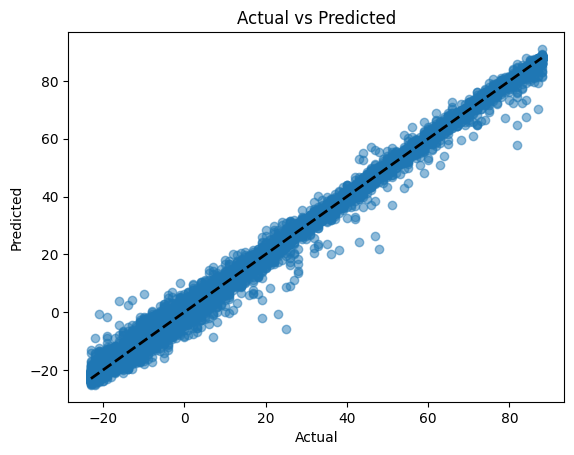

In [ ]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

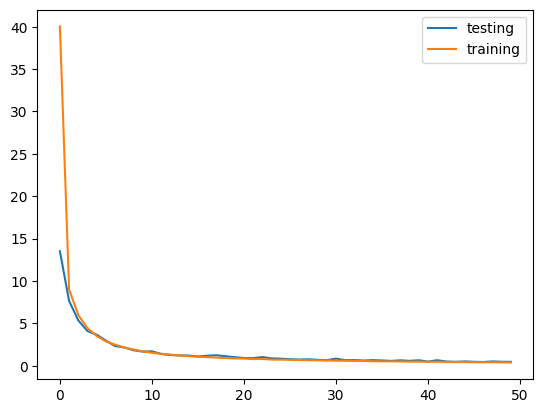

In [ ]:
ax = plt.subplot()

df_history = pd.DataFrame.from_dict(history.history)
df_history['epochs'] = history.epoch

ax.plot(df_history.epochs, df_history.val_loss, label='testing')
ax.plot(df_history.epochs, df_history.loss, label='training')
ax.legend()

In [ ]:
bin_2 = df[df['MONTH'] == 6]

In [ ]:
bin_2

In [ ]:
bin_2 = bin_2[['AIRLINE_CODE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DISTANCE', 'DEPARTURE_DELAY']]
bin_2['delay'] = [0 if x <= 0 else 1 for x in bin_2['DEPARTURE_DELAY']]

In [ ]:
bin_2.isnull().sum()

AIRLINE_CODE           0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DISTANCE               0
DEPARTURE_DELAY        0
delay                  0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical features using pandas get_dummies() function
bin_data_encoded = pd.get_dummies(bin_2[['AIRLINE_CODE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']])

# Combine the encoded features with the rest of the data
bin_data_encoded = pd.concat([bin_data_encoded, bin_2[['SCHEDULED_DEPARTURE', 'DISTANCE']]], axis=1)

# Split the data into train and test sets
X = bin_data_encoded
y = bin_2.delay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[42945 13159]
 [21867 20931]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.77      0.71     56104
           1       0.61      0.49      0.54     42798

    accuracy                           0.65     98902
   macro avg       0.64      0.63      0.63     98902
weighted avg       0.64      0.65      0.64     98902



In [ ]:
x

In [ ]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import plotly.graph_objects as go
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 50)
from sklearn.metrics import classification_report, confusion_matrix, recall_score



In [ ]:
import pandas as pd
df = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

In [ ]:
# Merge based on ' ORIGIN_AIRPORT'
df = pd.merge(df, airports[['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', "LATITUDE", 'LONGITUDE']],
              left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Merge based on 'DESTINATION_AIRPORT'
df = pd.merge(df, airports[['IATA_CODE', 'AIRPORT','STATE', 'CITY']], left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')


df = pd.merge(df, airlines, left_on='AIRLINE', right_on='IATA_CODE')

In [ ]:
df=df.rename(columns={
    'CITY_x' : 'ORIGIN_CITY',
    'STATE_x' : 'ORIGIN_STATE',
    'AIRPORT_x' : 'ORIGIN_AIRPORT_NAME',
    'AIRPORT_y' : 'DESTINATION_AIRPORT_NAME',
    'CITY_y' : 'DESTINATION_CITY',
    'STATE_y' : 'DESTINATION_STATE',
    'AIRLINE_y' : 'AIRLINE_NAME',
    'AIRLINE_x' : 'AIRLINE_CODE'})

In [ ]:
df = df.dropna(subset=['ARRIVAL_TIME'])

In [ ]:
maa = df[df['MONTH'] == 6]

In [ ]:
delay_6 = []
for row in maa['ARRIVAL_DELAY']:
    if row <= 0:
        delay_6.append(0)
    elif 0 < row <= 15:
        delay_6.append(1)
    elif 15 < row <=30:
        delay_6.append(2)
    elif 30 < row <= 60:
        delay_6.append(3)
    elif 60 < row <= 180:
        delay_6.append(4)
    else:
        delay_6.append(5)

maa['delay_6'] = delay_6

<ipython-input-78-6c1e5517f408>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maa['delay_6'] = delay_6


In [ ]:
maa = maa.dropna(subset=['ELAPSED_TIME'])

In [ ]:
maa = maa.drop(['DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'YEAR', 'DAY', 'MONTH', 'FLIGHT_NUMBER', 'SECURITY_DELAY','TAIL_NUMBER', 'SCHEDULED_DEPARTURE',  'DEPARTURE_TIME',  'ARRIVAL_TIME',
                 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'LONGITUDE', 'LATITUDE', 'IATA_CODE_x', 'SCHEDULED_ARRIVAL',
                'ORIGIN_AIRPORT_NAME', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT_NAME', 'DESTINATION_STATE', 'DESTINATION_CITY', 'IATA_CODE','IATA_CODE_y','AIRLINE_CODE', 'ARRIVAL_DELAY'], axis=1)

In [ ]:
cols = ['DAY_OF_WEEK', 'AIRLINE_NAME', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
maa = pd.get_dummies(maa, columns=cols)
maa

DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
1939                -8.0       7.0        44.0           197.0         190.0   
1940               -12.0      12.0       125.0           200.0         198.0   
1941                -8.0       9.0       206.0           195.0         219.0   
1942                -7.0       8.0       241.0           195.0         209.0   
1943                -7.0       9.0       502.0           195.0         203.0   
...                  ...       ...         ...             ...           ...   
5332648             -9.0      23.0      1354.0            70.0          75.0   
5332649             -7.0      17.0      2145.0            74.0          69.0   
5332650              9.0      17.0      1406.0            70.0          82.0   
5332651             10.0      22.0      2207.0            74.0          75.0   
5332652            123.0      12.0      2350.0            74.0          65.0   

         AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  delay_6  DAY_OF_WEEK_1  \
1939        179.0      1448      443.0      4.0        0              1   
1940        181.0      1448      526.0      5.0        0              1   
1941        205.0      1448      631.0      5.0        2              1   
1942        193.0      1448      654.0      8.0        1              1   
1943        186.0      1448      908.0      8.0        1              1   
...           ...       ...        ...      ...      ...            ...   
5332648      48.0       294     1442.0      4.0        0              0   
5332649      47.0       294     2232.0      5.0        0              0   
5332650      62.0       294     1508.0      3.0        2              1   
5332651      50.0       294     2257.0      3.0        1              1   
5332652      50.0       294       40.0      3.0        4              0   

         DAY_OF_WEEK_2  DAY_OF_WEEK_3  DAY_OF_WEEK_4  DAY_OF_WEEK_5  \
1939                 0              0              0              0   
1940                 0              0              0              0   
1941                 0              0              0              0   
1942                 0              0              0              0   
1943                 0              0              0              0   
...                ...            ...            ...            ...   
5332648              0              0              0              0   
5332649              0              0              0              0   
5332650              0              0              0              0   
5332651              0              0              0              0   
5332652              1              0              0              0   

         DAY_OF_WEEK_6  DAY_OF_WEEK_7  AIRLINE_NAME_Alaska Airlines Inc.  \
1939                 0              0                                  1   
1940                 0              0                                  1   
1941                 0              0                                  1   
1942                 0              0                                  1   
1943                 0              0                                  1   
...                ...            ...                                ...   
5332648              0              1                                  0   
5332649              0              1                                  0   
5332650              0              0                                  0   
5332651              0              0                                  0   
5332652              0              0                                  0   

         AIRLINE_NAME_American Airlines Inc.  \
1939                                       0   
1940                                       0   
1941                                       0   
1942                                       0   
1943                                       0   
...                                      ...   
5332648                                    0 

In [ ]:
X = maa.drop(columns=['delay_6'])
y = maa['delay_6']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# One-hot encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [ ]:
maa.isnull().sum()

DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
                          ..
DESTINATION_AIRPORT_WRG    0
DESTINATION_AIRPORT_WYS    0
DESTINATION_AIRPORT_XNA    0
DESTINATION_AIRPORT_YAK    0
DESTINATION_AIRPORT_YUM    0
Length: 659, dtype: int64

In [ ]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_validation_scaled, y_validation))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test_scaled)

# Decode one-hot encoded predictions to get class labels
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))

Epoch 1/10
10781/10781 [==============================] - 35s 3ms/step - loss: 0.4179 - accuracy: 0.8284 - val_loss: 0.2906 - val_accuracy: 0.8793
Epoch 2/10
10781/10781 [==============================] - 34s 3ms/step - loss: 0.2398 - accuracy: 0.8984 - val_loss: 0.2227 - val_accuracy: 0.9049
Epoch 3/10
10781/10781 [==============================] - 35s 3ms/step - loss: 0.2055 - accuracy: 0.9123 - val_loss: 0.1996 - val_accuracy: 0.9147
Epoch 4/10
10781/10781 [==============================] - 33s 3ms/step - loss: 0.1857 - accuracy: 0.9207 - val_loss: 0.1974 - val_accuracy: 0.9173
Epoch 5/10
10781/10781 [==============================] - 34s 3ms/step - loss: 0.1719 - accuracy: 0.9269 - val_loss: 0.1800 - val_accuracy: 0.9235
Epoch 6/10
10781/10781 [==============================] - 35s 3ms/step - loss: 0.1604 - accuracy: 0.9319 - val_loss: 0.1641 - val_accuracy: 0.9307
Epoch 7/10
10781/10781 [==============================] - 34s 3ms/step - loss: 0.1521 - accuracy: 0.9355 - val_loss: 0

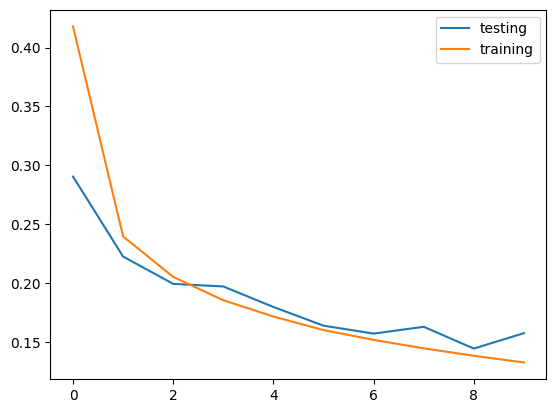

In [ ]:
ax = plt.subplot()

df_history = pd.DataFrame.from_dict(history.history)
df_history['epochs'] = history.epoch

ax.plot(df_history.epochs, df_history.val_loss, label='testing')
ax.plot(df_history.epochs, df_history.loss, label='training')
ax.legend()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model with dropout layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Add dropout layer with 20% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.2),  # Add another dropout layer
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with dropout and early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_validation_scaled, y_validation), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test_scaled)

# Decode one-hot encoded predictions to get class labels
predicted_classes = label_encoder.inverse_transform(predictions.argmax(axis=1))


Epoch 1/100
10781/10781 [==============================] - 38s 3ms/step - loss: 0.5358 - accuracy: 0.7815 - val_loss: 0.3193 - val_accuracy: 0.8677
Epoch 2/100
10781/10781 [==============================] - 35s 3ms/step - loss: 0.3259 - accuracy: 0.8637 - val_loss: 0.2513 - val_accuracy: 0.8950
Epoch 3/100
10781/10781 [==============================] - 38s 4ms/step - loss: 0.2836 - accuracy: 0.8824 - val_loss: 0.2199 - val_accuracy: 0.9099
Epoch 4/100
10781/10781 [==============================] - 51s 5ms/step - loss: 0.2613 - accuracy: 0.8912 - val_loss: 0.2123 - val_accuracy: 0.9120
Epoch 5/100
10781/10781 [==============================] - 36s 3ms/step - loss: 0.2460 - accuracy: 0.8976 - val_loss: 0.1952 - val_accuracy: 0.9201
Epoch 6/100
10781/10781 [==============================] - 37s 3ms/step - loss: 0.2340 - accuracy: 0.9029 - val_loss: 0.1851 - val_accuracy: 0.9244
Epoch 7/100
10781/10781 [==============================] - 36s 3ms/step - loss: 0.2272 - accuracy: 0.9067 - val_

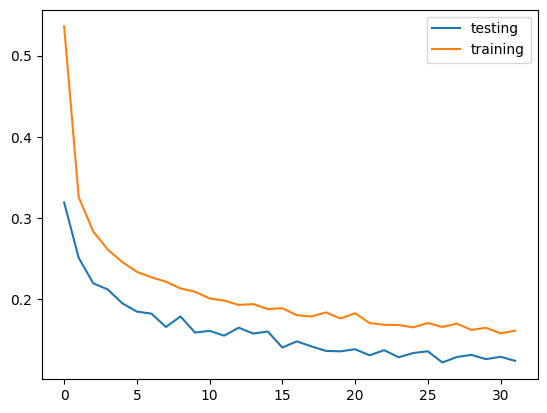

In [ ]:
ax = plt.subplot()

df_history = pd.DataFrame.from_dict(history.history)
df_history['epochs'] = history.epoch

ax.plot(df_history.epochs, df_history.val_loss, label='testing')
ax.plot(df_history.epochs, df_history.loss, label='training')
ax.legend()

In [ ]:
!chmod 600 /content/kaggle.json